In [1]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np

import plotly.graph_objects as go
import matplotlib.pyplot as plt

import statsmodels.tsa.stattools as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Set the maximum width of the display
pd.set_option('display.width', 1000)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 30)

pd.set_option('display.precision', 2)

In [3]:
# fetch dataset
data = fetch_ucirepo(id=374)
  
# variable information 
print(data.variables)

           name     role        type demographic description  units missing_values
0          date  Feature        Date        None        None   None             no
1    Appliances   Target     Integer        None        None     Wh             no
2        lights  Feature     Integer        None        None     Wh             no
3            T1  Feature  Continuous        None        None      C             no
4          RH_1  Feature  Continuous        None        None      %             no
5            T2  Feature  Continuous        None        None      C             no
6          RH_2  Feature  Continuous        None        None      %             no
7            T3  Feature  Continuous        None        None      C             no
8          RH_3  Feature  Continuous        None        None      %             no
9            T4  Feature  Continuous        None        None      C             no
10         RH_4  Feature  Continuous        None        None      %             no
11  

In [4]:
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data=data.data.features)

re_express = r'(\d{4})-(\d{2})-(\d{2})(\d{2}):(\d{2}):(\d{2})'

# Replace using the pattern
df['date'] = df['date'].str.replace(re_express, r'\1-\2-\3 \4:\5:\6', regex=True)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S", errors='raise')

# df['date'] = pd.date_range(start='2016-01-11 17:00:00', end='2016-05-27 18:00:00', freq='10min')

# If the data has target labels, you can also add them to the DataFrame
df['target'] = data.data.targets

# # Set the 'date' column as the index
# df.set_index('date', inplace=True)

# # Optionally, sort the DataFrame by the new datetime index
# df.sort_index(inplace=True)

# Display the first few rows of the DataFrame
df.head()

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,target
0,2016-01-11 17:00:00,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.2,48.90,17.03,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28,60
1,2016-01-11 17:10:00,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.2,48.86,17.07,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61,60
2,2016-01-11 17:20:00,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.2,48.73,17.00,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64,50
3,2016-01-11 17:30:00,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.1,48.59,17.00,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41,50
4,2016-01-11 17:40:00,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.1,48.59,17.00,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08,60


In [5]:
import numpy as np
import plotly.graph_objects as go
import statsmodels.tsa.stattools as smt
# import kaleido

def plot_ccf_plotly(target, exog, adjusted=False, nlags=150):
    """Plot CCF using Statsmodels and Plotly"""
    # Calculate Cross Correlation Function (CCF)
    ccfs = smt.ccf(target, exog, adjusted=adjusted)[:nlags+1]
    lags = np.arange(len(ccfs))[:nlags+1]
    
    # Create a stem plot using Plotly
    fig = go.Figure()

    # Add the stem lines
    for lag, ccf in zip(lags, ccfs):
        fig.add_trace(go.Scatter(
            x=[lag, lag],
            y=[0, ccf],
            mode='lines',
            line=dict(color='blue'),
            showlegend=False
        ))

    # Add the markers (dots at the end of the stems)
    fig.add_trace(go.Scatter(
        x=lags,
        y=ccfs,
        mode='markers',
        marker=dict(color='blue', size=8),
        name='CCF'
    ))

    # Update layout
    y_ticks = np.arange(-1, 1.2, 0.2)
    fig.update_layout(
        title=f"Cross Correlation (Statsmodels): {target.name} & {exog.name}",
        xaxis_title="Lag",
        yaxis_title="CCF",
        xaxis=dict(tickmode='linear'),
        yaxis=dict(range=[-1, 1], tickvals=y_ticks, ticktext=[f"{tick:.1f}" for tick in y_ticks]),
        showlegend=False,
        width = 1500,
        height = 400
    )

    # Show the plot
    # fig.show()
    fig.show("png")


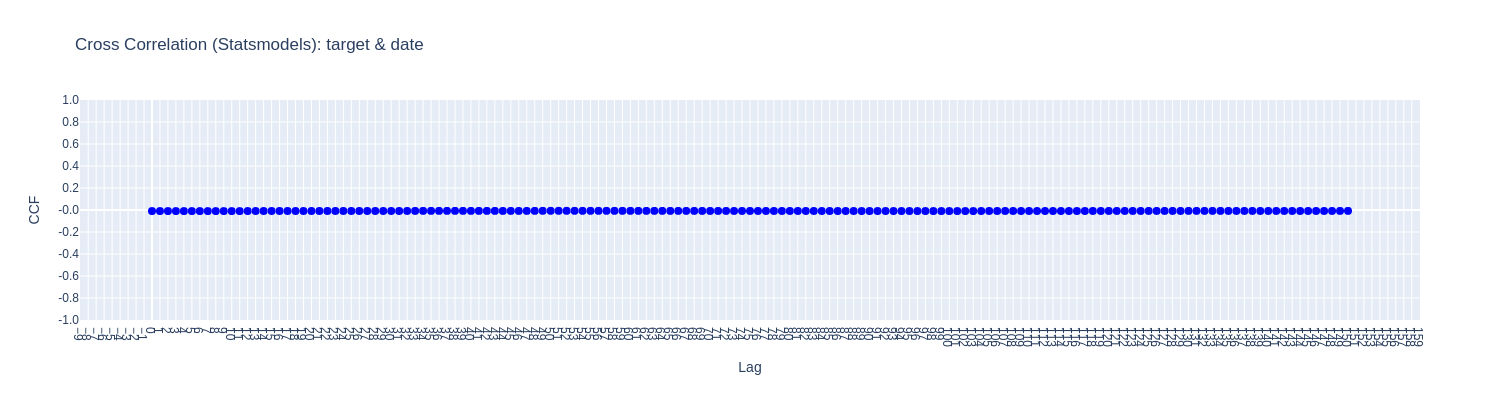

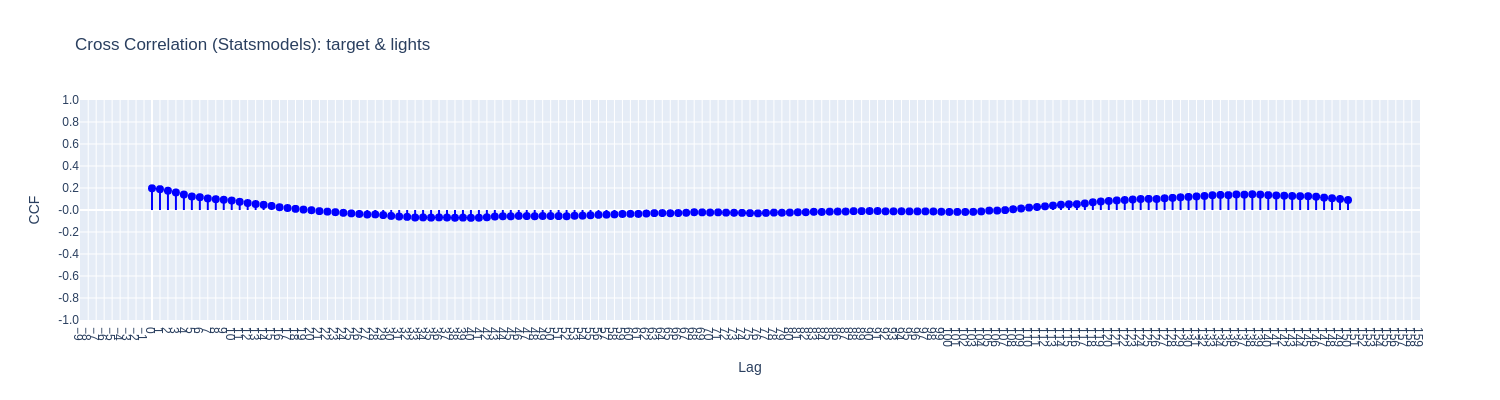

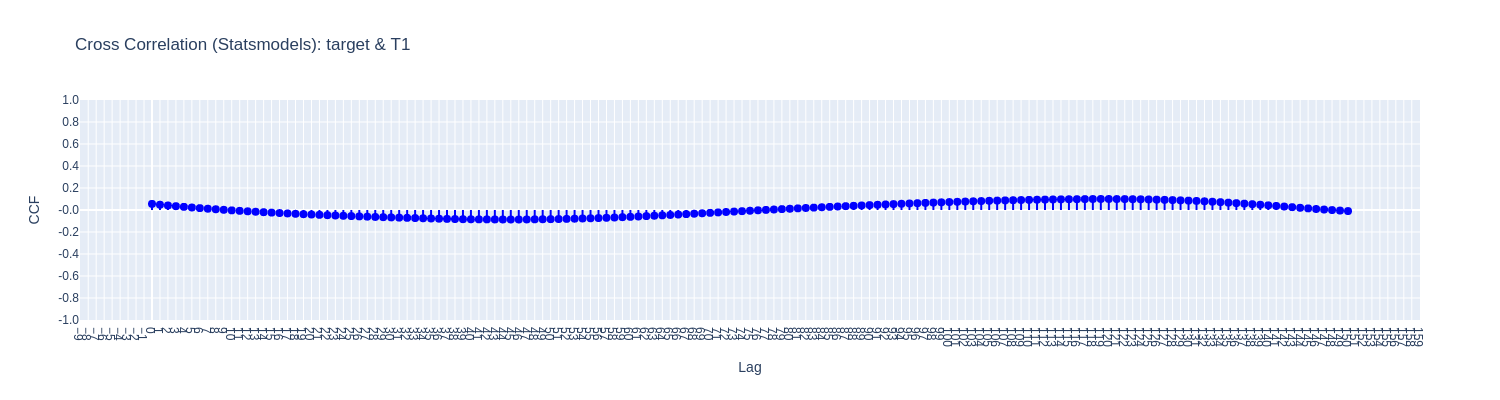

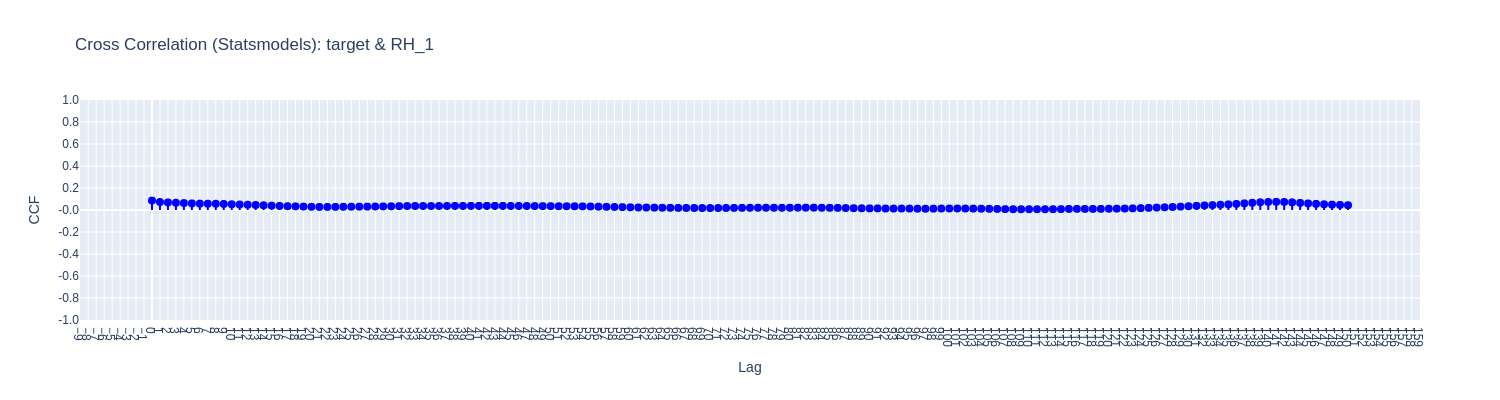

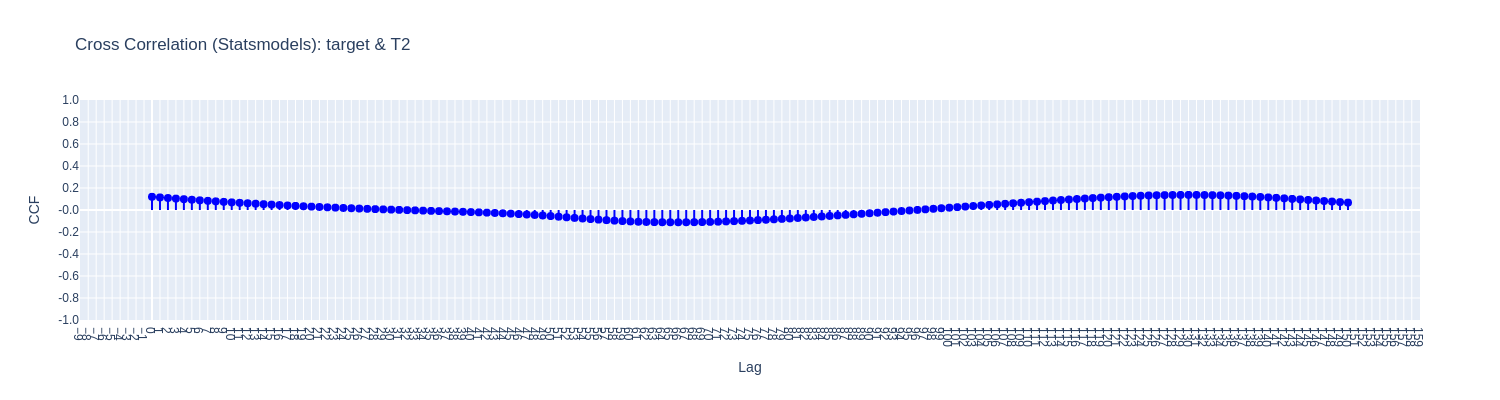

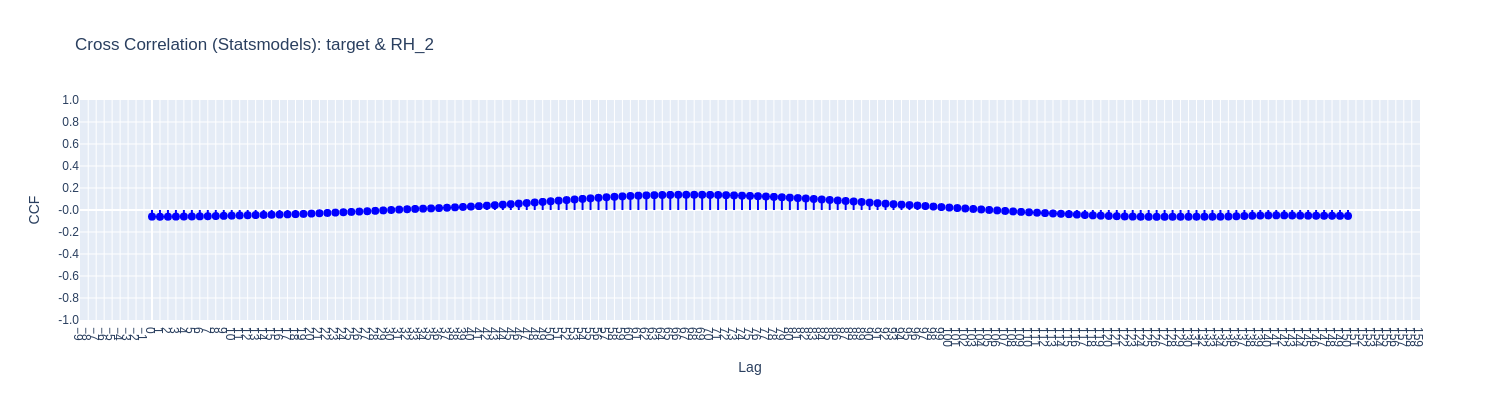

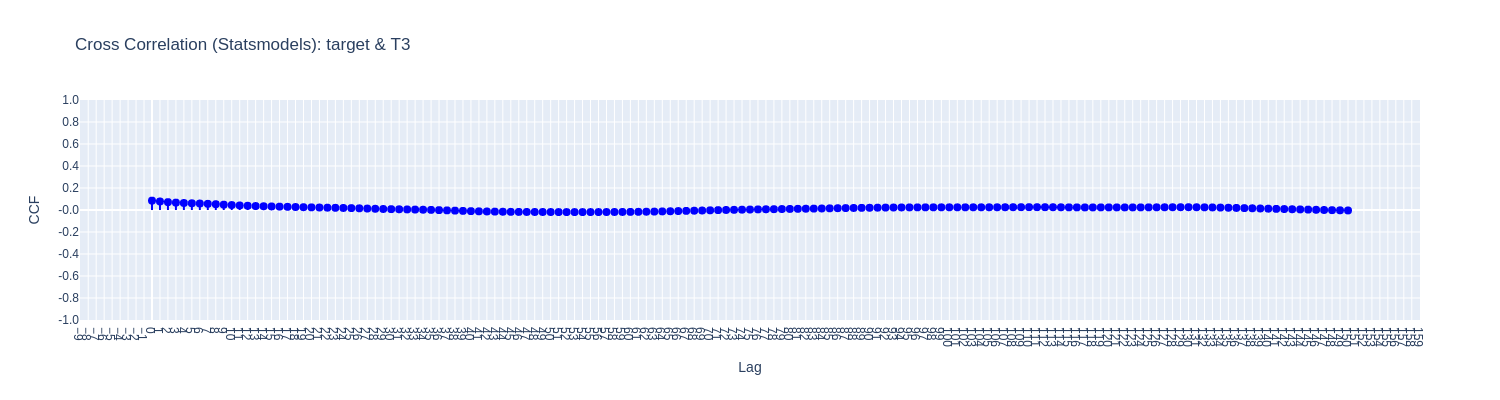

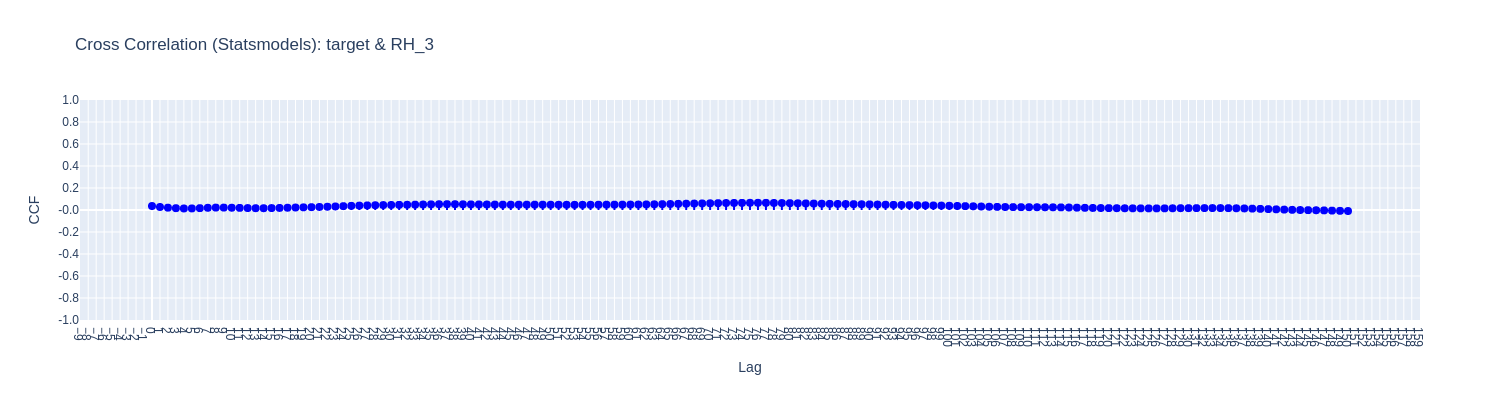

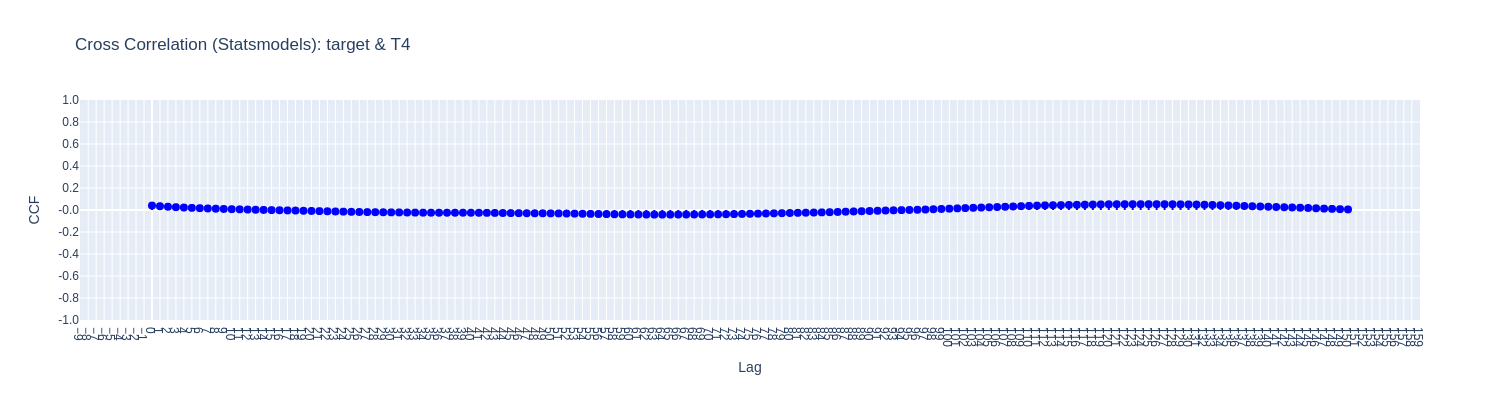

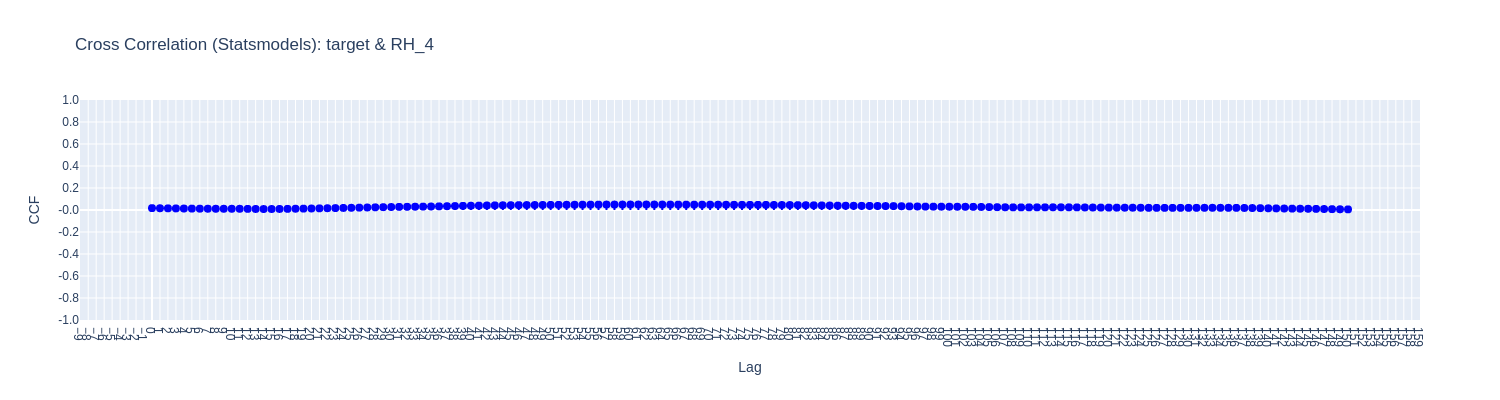

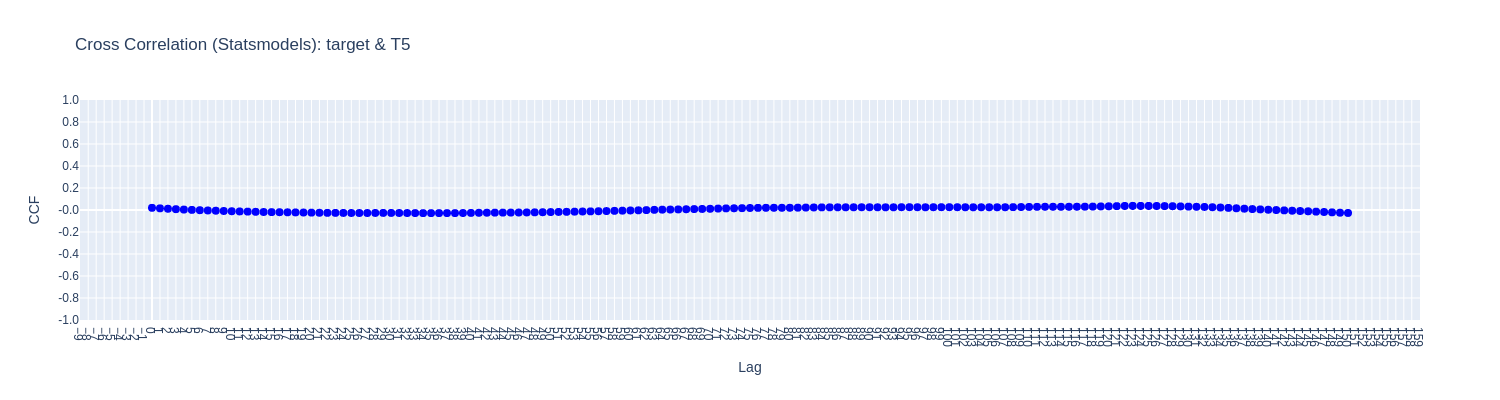

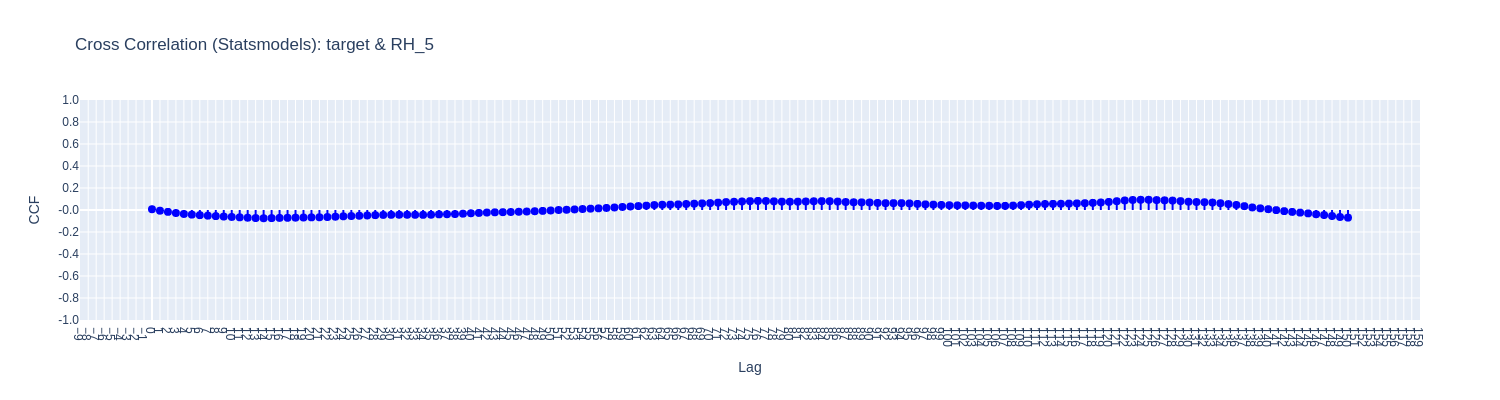

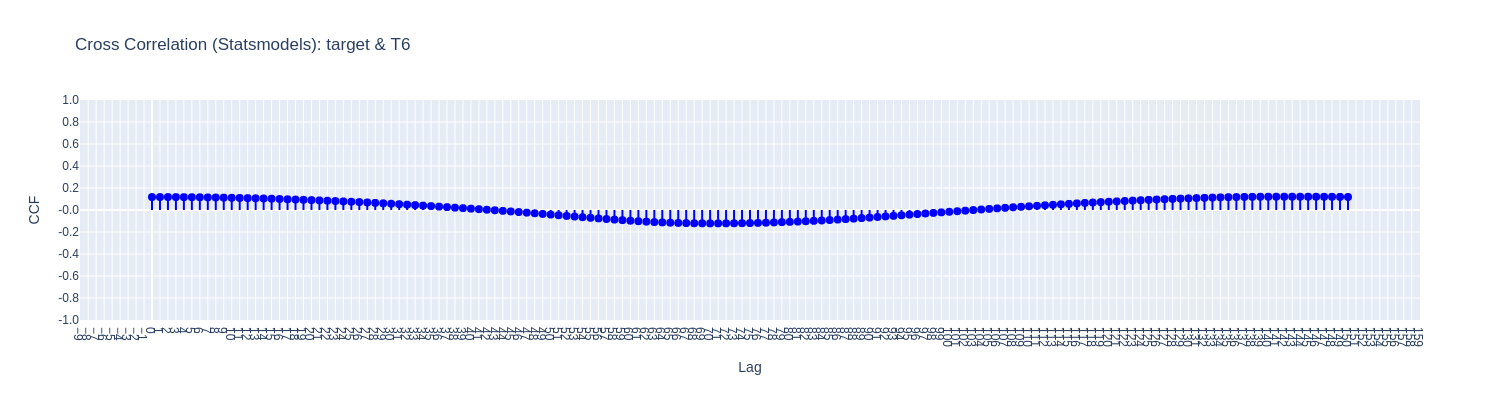

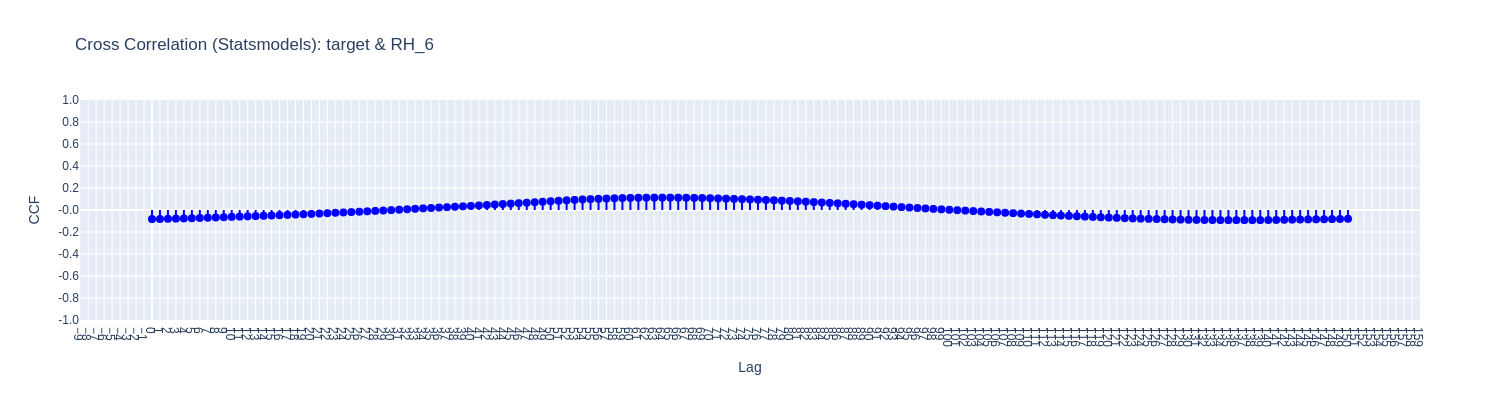

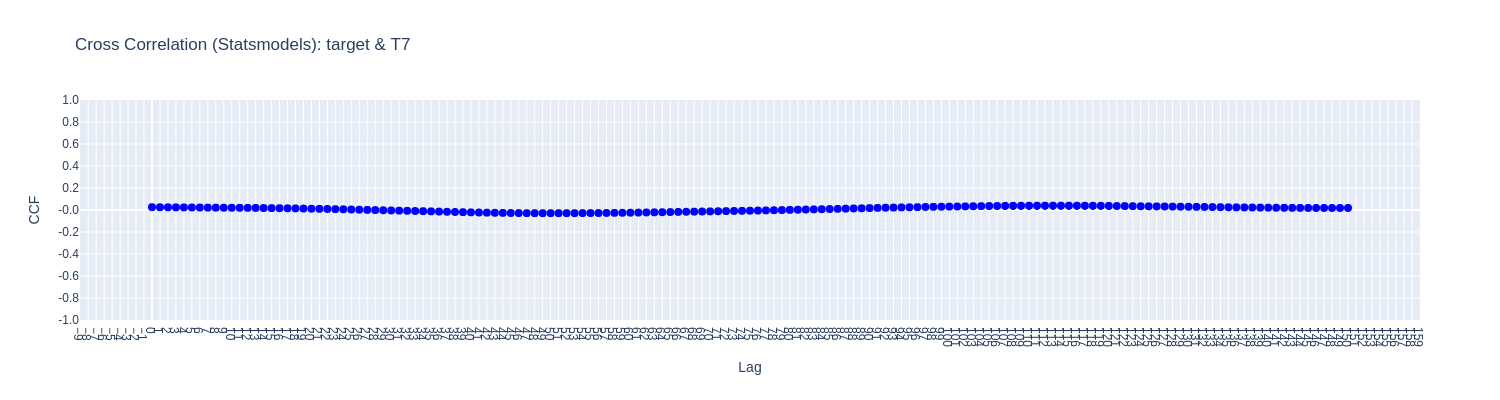

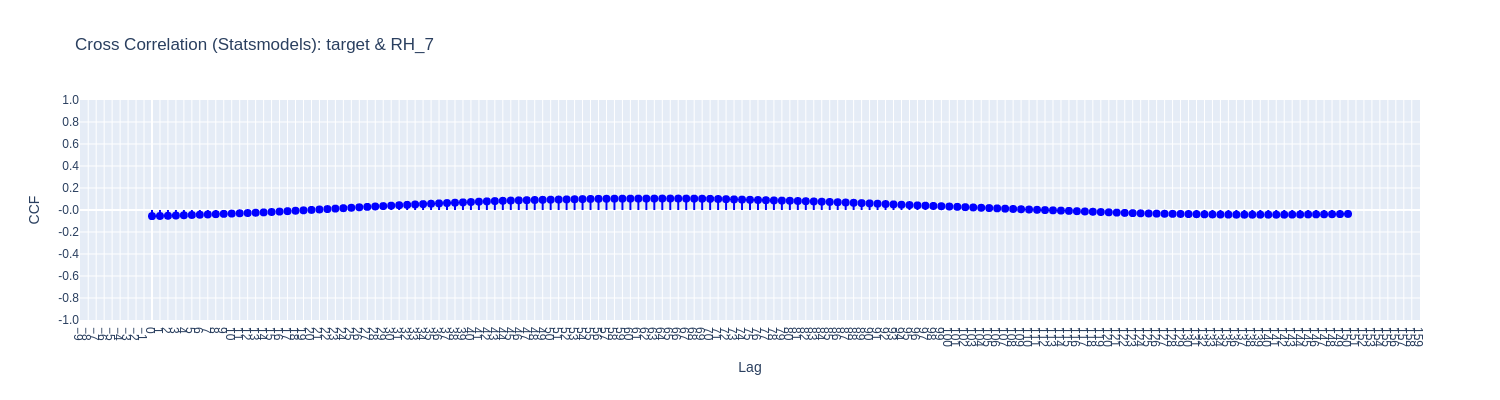

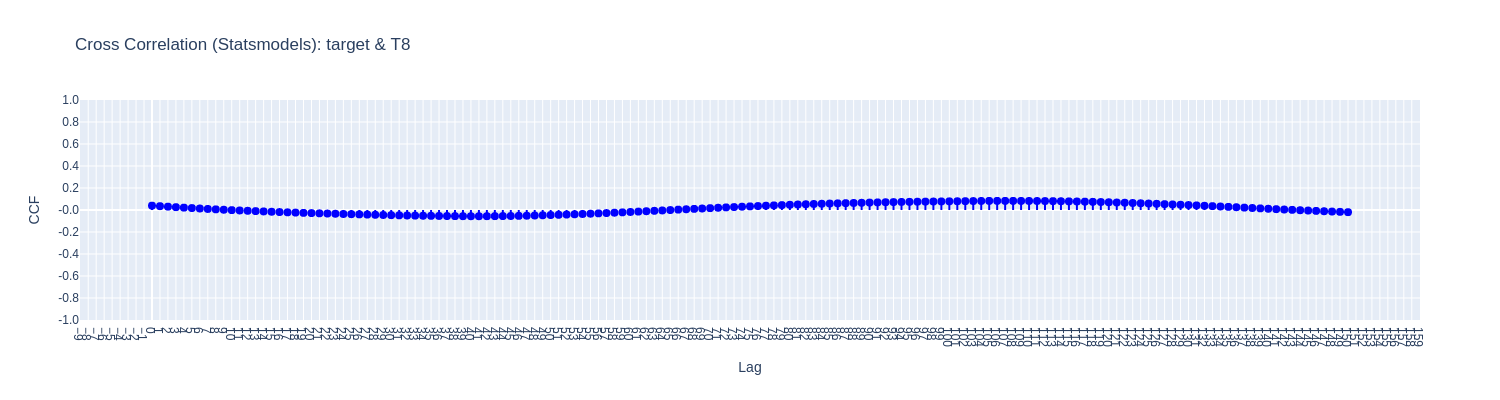

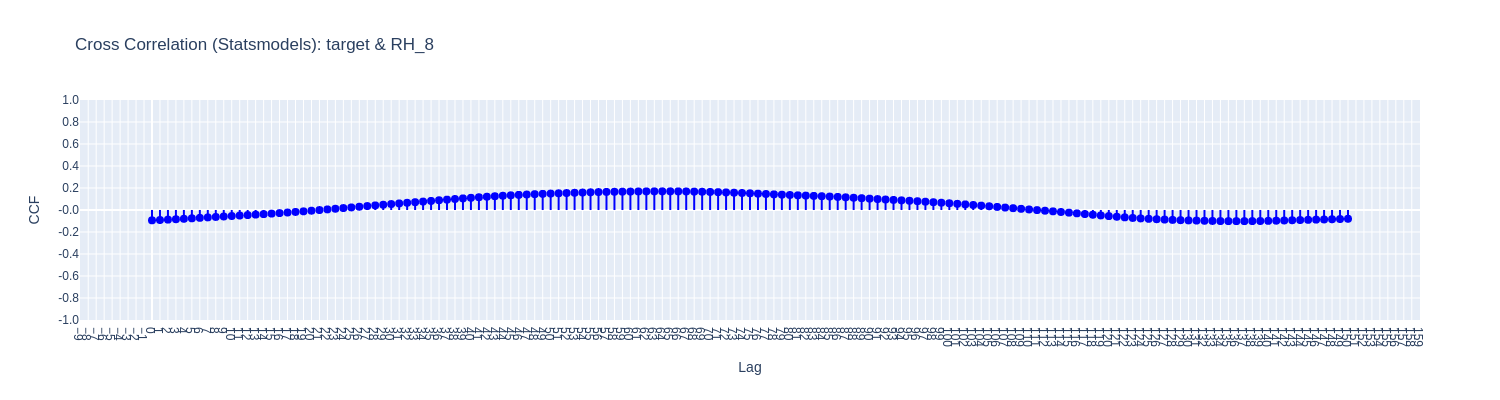

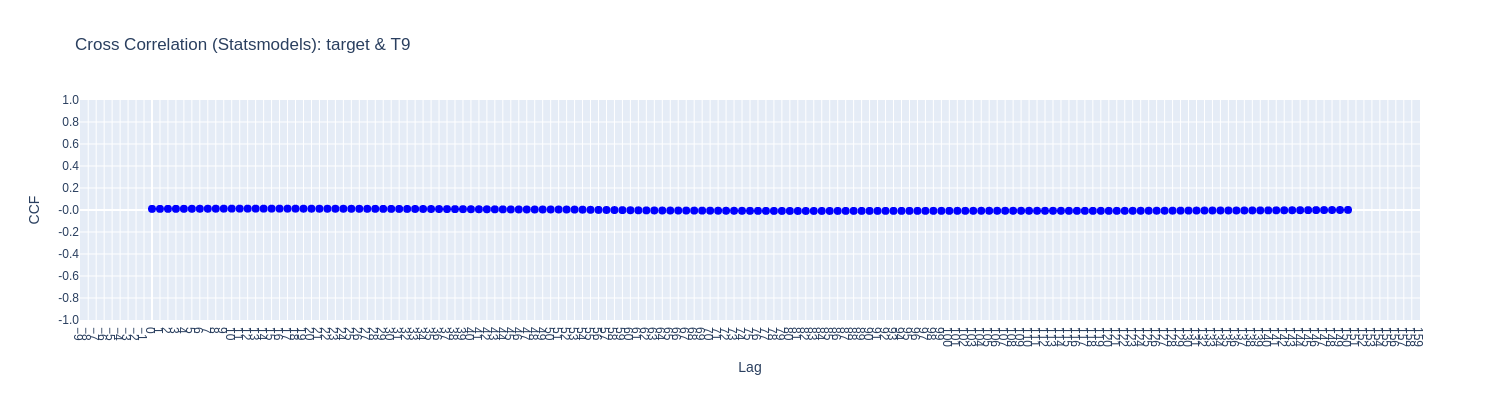

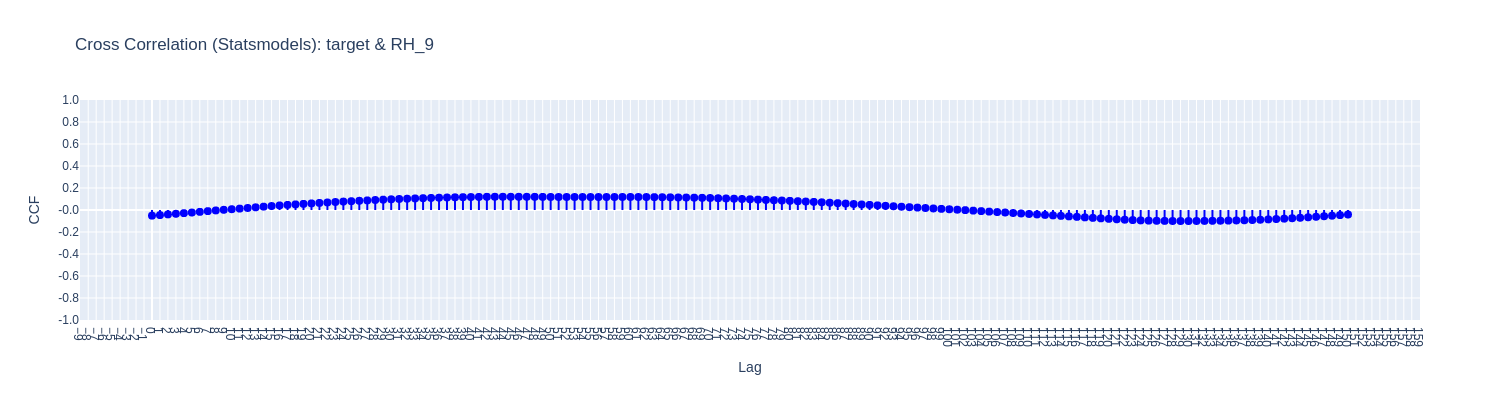

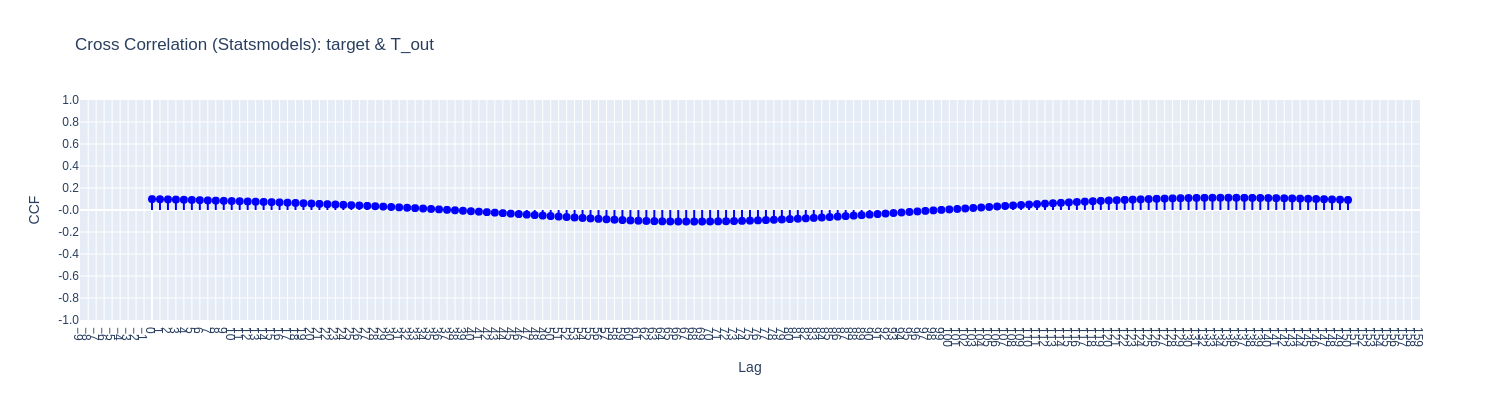

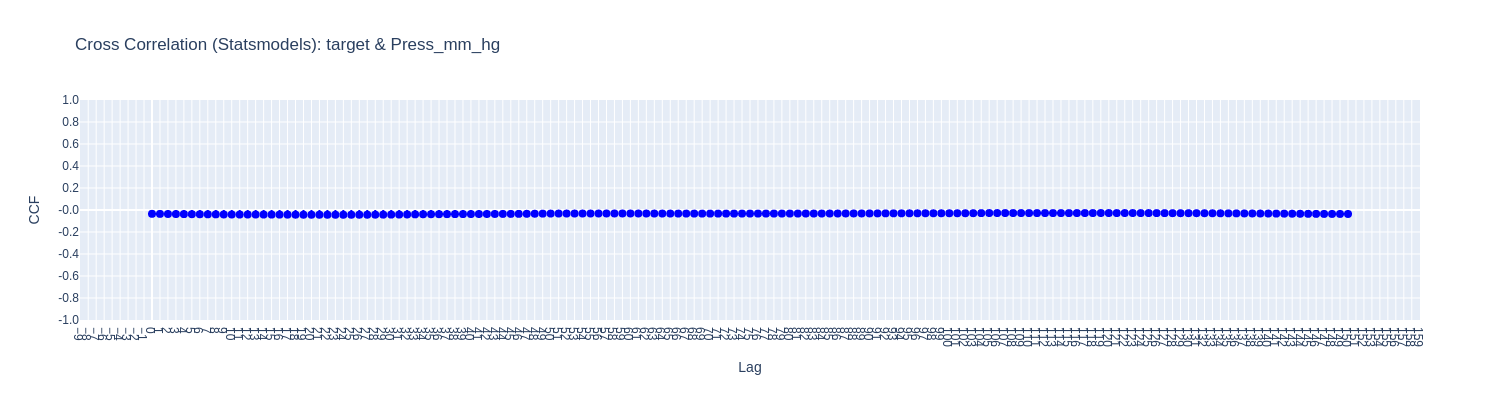

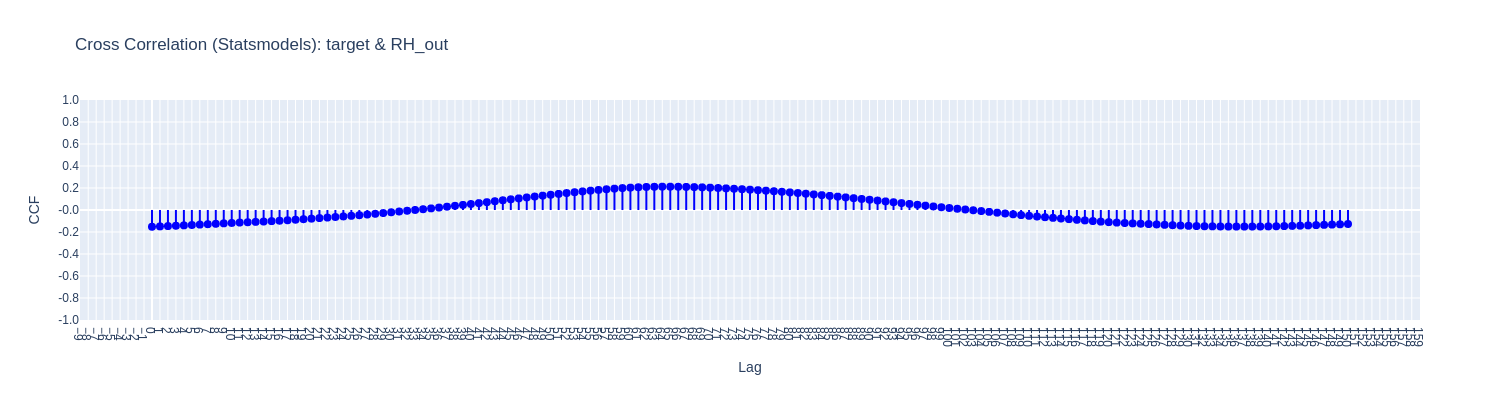

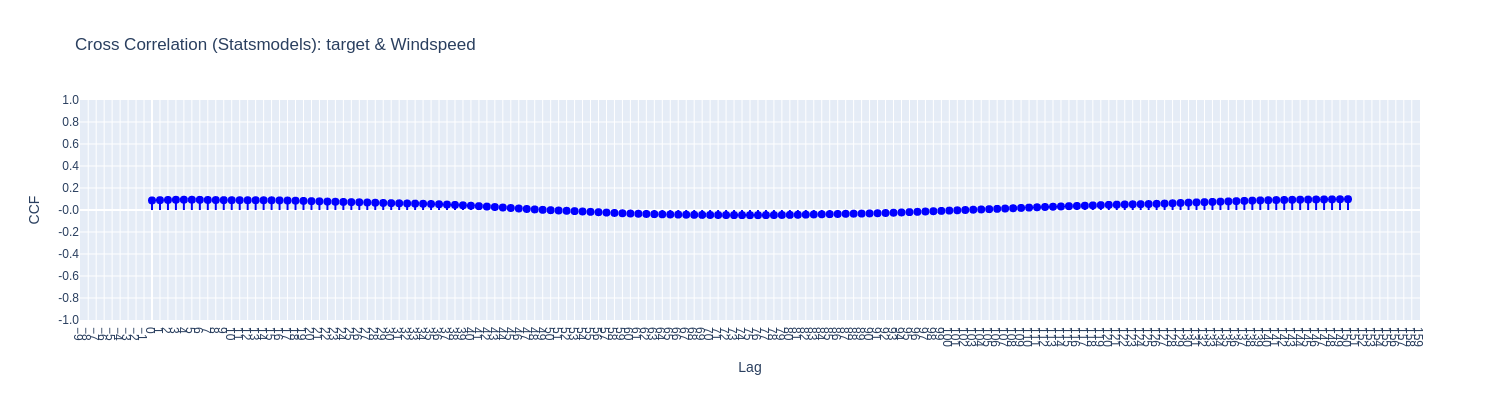

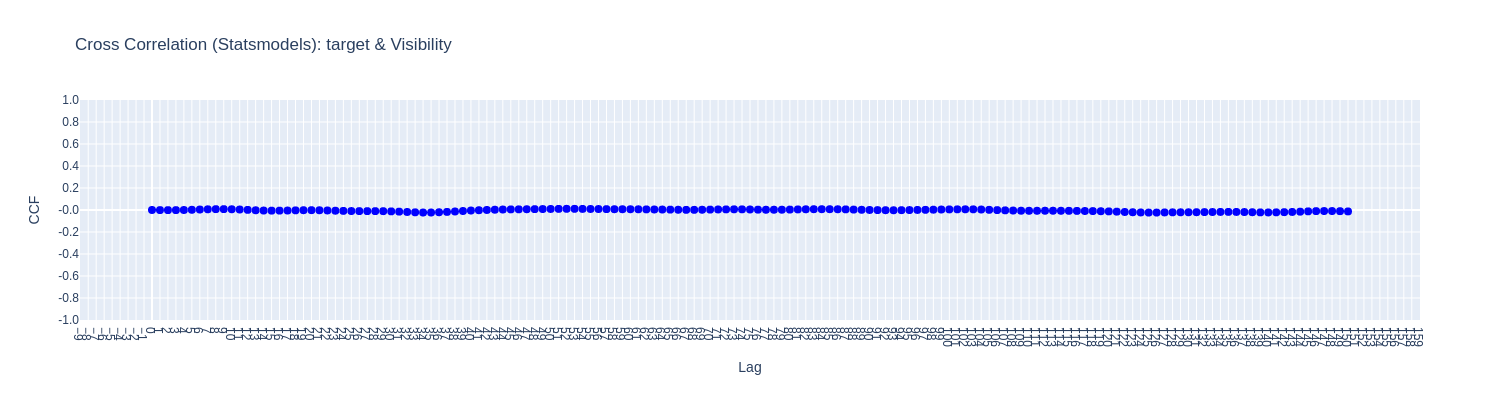

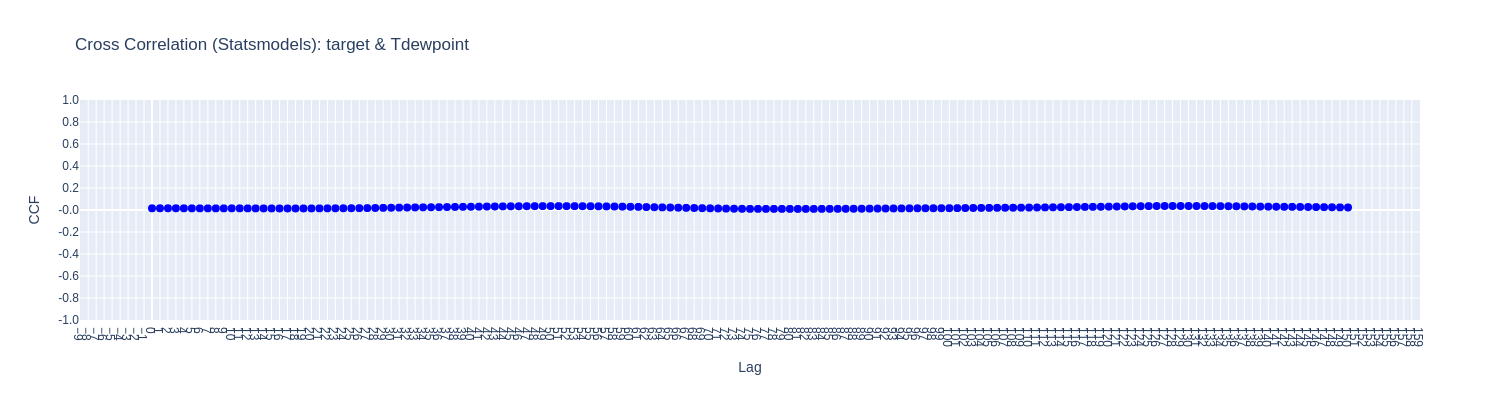

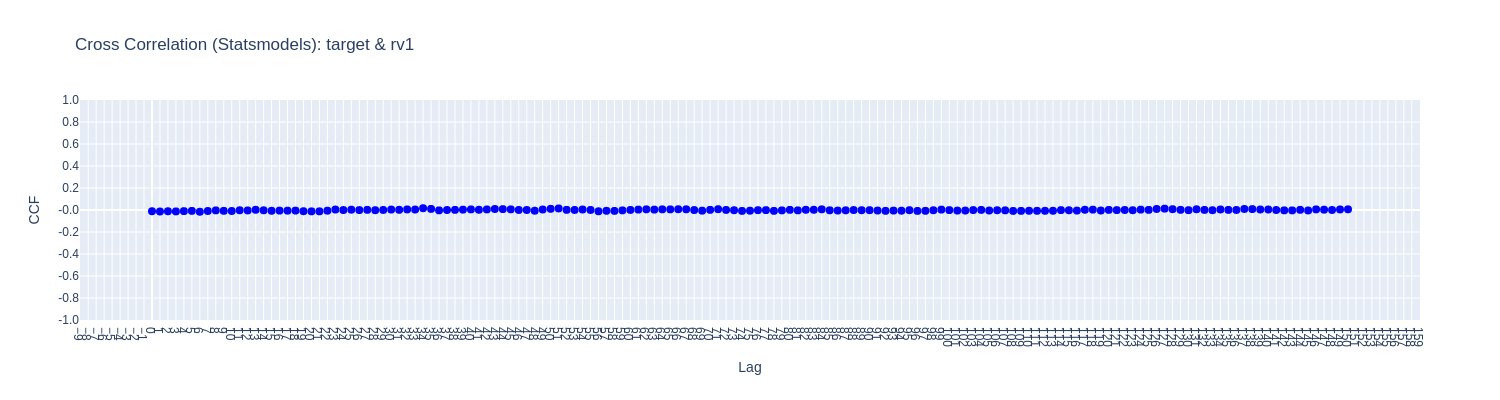

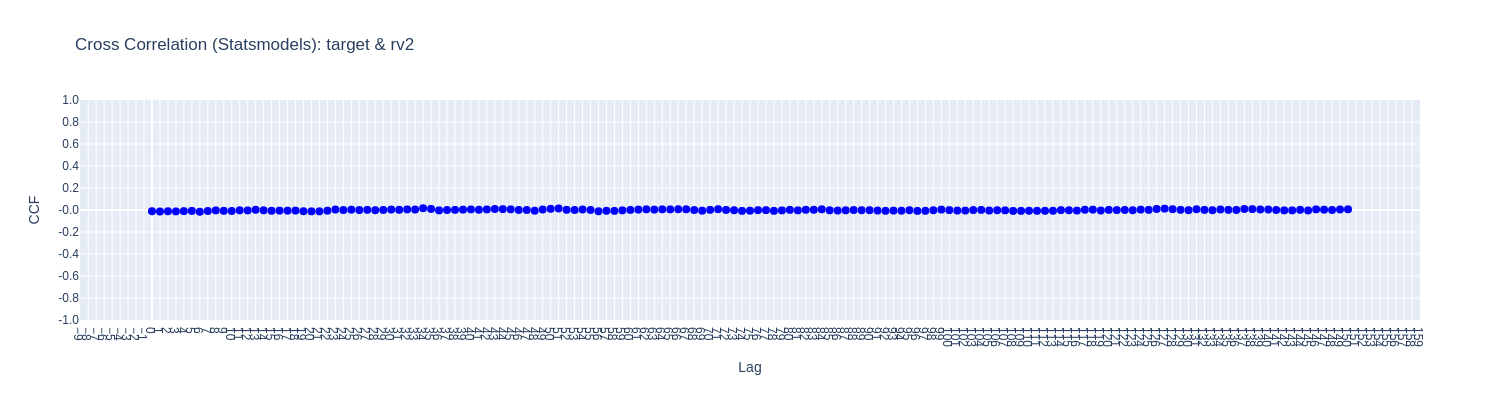

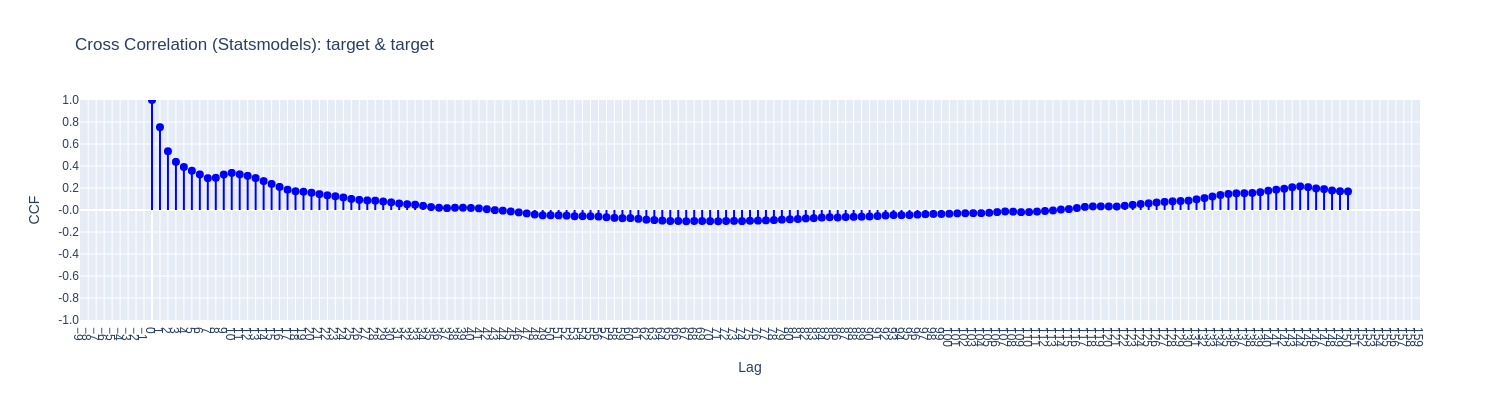

In [6]:
for name in df.columns:
    plot_ccf_plotly(df["target"], df[f"{name}"])